In [123]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./data/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


• country - название страны;

• child mort - показатель смертности детей до 5 лет;

• exports - показатель экспорта на душу населения;

• health - показатель затрат на здравоохранение на душу населения;

• imports - показатель импорта на душу населения;

• Income - средний доход на душу населения;

• Inflation - годовой показатель инфляции;

• life_ехрес - средняя продолжительность жизни;

• total_fer - суммарный коэффициент рождаемости;

• gdpp - значение ВВП на душу населения.

In [4]:
# Задание 7.1

# Каково максимальное значение показателя средней продолжительности жизни среди представленных стран? Ответ округлите до одного
# знака после точки-разделителя.
round(df['life_expec'].max(),1)


82.8

In [71]:
# Задание 7.2

# Чтобы получить более качественные результаты, необходимо стандартизировать данные. Используйте для этого StandardScaler. Примените
# его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта (таким образом можно будет
# проверить, что вы всё сделали корректно). Ответ округлите до двух знаков после точки-разделителя.
std_scal = StandardScaler()

columns = [x for x in df.columns if x != 'country']

X = df.drop(['country'],axis=1)
X_std = std_scal.fit_transform(X)
df_std = pd.DataFrame(X_std, columns=columns)
df_std = pd.merge(left=df['country'], right=df_std, left_index=True, right_index=True)

display(df_std)
print(df_std.iloc[0][1].round(2))

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,Yemen,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


1.29


<AxesSubplot: >

income        0.90
gdpp          0.90
child_mort    0.85
total_fer     0.85
exports       0.74
imports       0.74
life_expec    0.61
health        0.35
inflation     0.32
dtype: float64
imports      -0.25
health       -0.26
inflation    -0.26
exports      -0.32
gdpp         -0.48
income       -0.52
total_fer    -0.76
child_mort   -0.89
life_expec   -0.89
dtype: float64


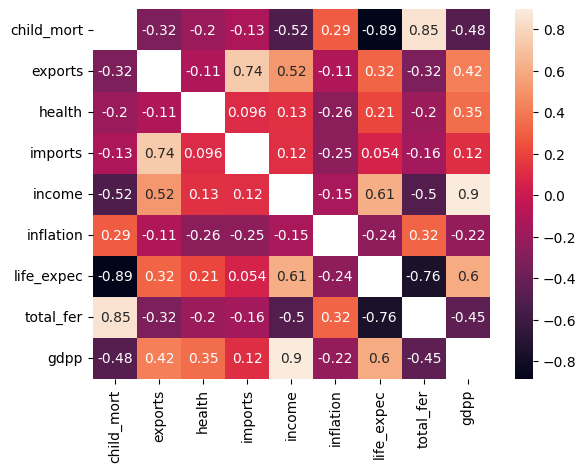

In [72]:
# Задание 7.3

# Как вы помните, нет смысла использовать сильно связанные друг с другом признаки, так как их можно преобразовать в один и таким образом
# уменьшить общее количество признаков. Давайте выясним, есть ли в данных такие признаки.
# Постройте матрицу корреляций для всех признаков. Найдите максимальный коэффициент корреляции. Запишите его в качестве ответа,
# поедварительно округлив до двух знаков после точки-разделителя
cor_mat = df_std.corr()
cor_mat = cor_mat.replace(1,np.NaN)

display(sns.heatmap(cor_mat, annot=True))
print(cor_mat.max().round(2).sort_values(ascending=False))
print(cor_mat.min().round(2).sort_values(ascending=False))

In [80]:
# Задание 7.4

# Теперь понизим размерность данных - возьмём для этого метод главных компонент (PCA) как самый простой и популярный.
# Найдите минимальное число компонент, которые суммарно могут объяснить как минимум 90 % разброса данных.
pca = PCA(n_components=0.9, random_state=42)
pca.fit(X_std)
pca.n_components_

5

In [77]:
# Задание 7.5

# Используйте главные компоненты, выделенные в предыдущем задании.
# Какую долю дисперсии объясняет первая главная компонента? Ответ округлите до двух знаков после точки-разделителя.
pca.explained_variance_ratio_.round(2)

array([0.46, 0.17, 0.13, 0.11, 0.07])

<AxesSubplot: >

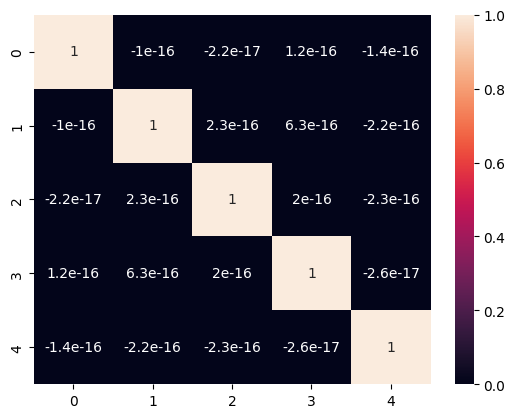

In [124]:
# Задание 7.6

# Как вы помните, при создании компонент с помощью РСА они должны получиться независимыми, то есть мы не должны теперь наблюдать
# высоких коэффициентов корреляции.
# Постройте матрицу корреляций. Сколько значений в ней превышают 0.001, не считая единичных значений на главной диагонали?
pca_df = pca.fit_transform(X_std)
sns.heatmap(np.corrcoef(pca_df.transpose()), annot=True)

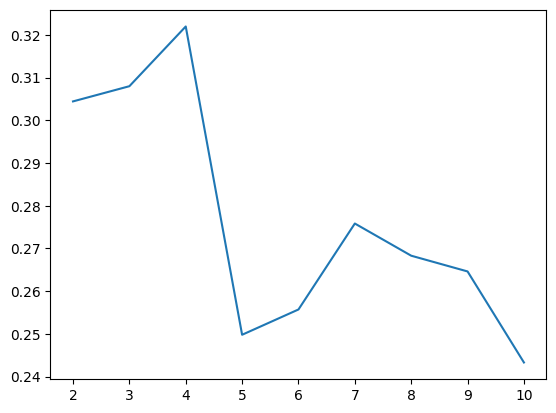

In [135]:
# Задание 7.7

# Теперь, когда мы уменьшили размерность данных, можно переходить к кластеризации. Подберите оптимальное количество кластеров с
# помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. Для кластеризации используйте алгоритм k-
# means++. В качестве значения параметра random state возьмите число 1
# Суля по полученным результатам, сколько кластеров лучше всего взять?
clusters = [x for x in range(2,11)]
sil_score = []

for i in clusters:
    kmeans_base = KMeans(n_clusters=i, random_state=1)
    kmeans_base.fit(pca_df)
    sil_score.append(silhouette_score(pca_df, kmeans_base.labels_))

sns.lineplot(x=clusters,y=sil_score);

<AxesSubplot: xlabel='cluster', ylabel='child_mort'>

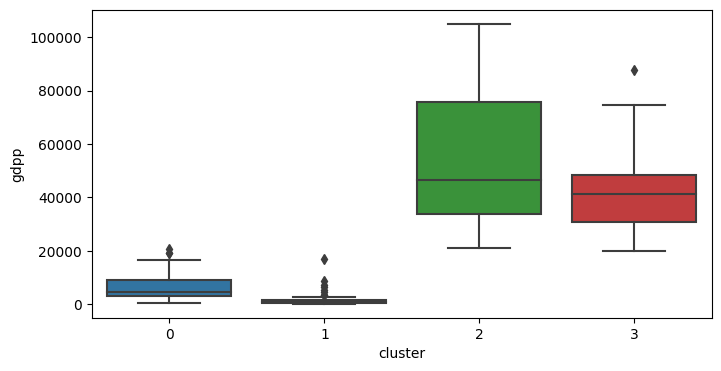

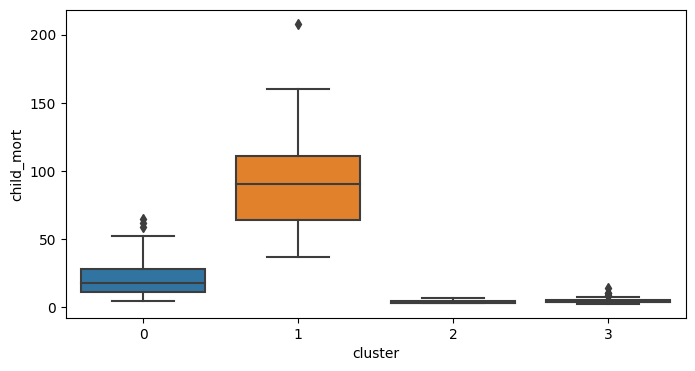

In [145]:
# Задание 7.8

# Теперь, когда оптимальное количество кластеров выбрано, реализуйте алгоритм k-means++ с этим параметром. В качестве значения
# random state возьмите число 1 .
# В какой кластер попали страны, у которых самый высокий показатель детской смертности и самый низкий ВВП на душу населения?
kmeans_model = KMeans(n_clusters=4, random_state=1)
kmeans_model.fit(pca_df)
df['cluster'] = kmeans_model.labels_

plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(x='cluster', y='gdpp', data=df)
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(x='cluster', y='child_mort', data=df)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170,1


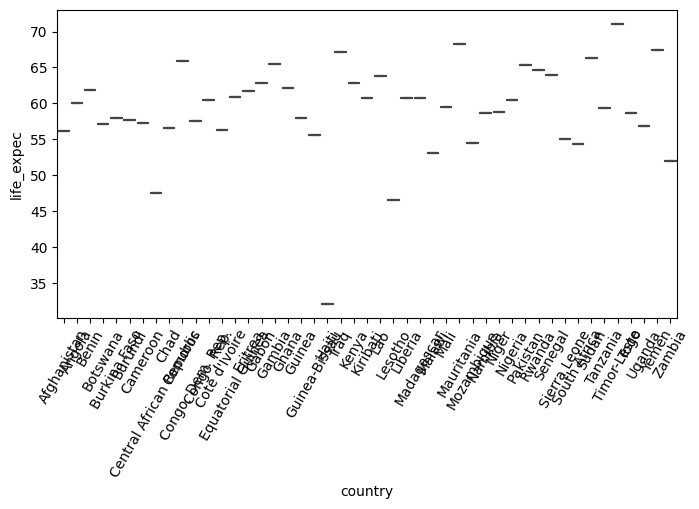

In [163]:
# Задание 7.9

# Итак, мы понимаем, что именно в выбранном нами кластере находятся страны, которые особенно остро нуждаются в финансовой помощи.
# Однако на все страны у нас не хватит ресурсов, поэтому давайте выберем из выделенного кластера три страны, в которых самая маленькая
# продолжительность жизни.

target_cluster = df.query("cluster == 1")

fig, axes = plt.subplots(1,1, figsize=(8,4))
boxplot = sns.boxplot(data=target_cluster, x='country', y='life_expec', ax=axes)

axes.xaxis.set_tick_params(rotation=60)

display(target_cluster.query("life_expec < 50"))
